<a href="https://colab.research.google.com/github/AnnaBujniewicz/UML_-_SML_project/blob/main/UML_SML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
The dataset was created through web scraping through Metacritic webside.

This dataset has 16719 entries and it has 11563 unique titles across 16 columns.

It is a collection of data about videogames and its releases through 31 different consols within the time period 1980 to 2017.

The data we used can be found here: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

An interesting documentary about the history of the video games that provides insight into some of the older consoles and games that can be found in the data set: https://en.wikipedia.org/wiki/High_Score_(TV_series)#:~:text=High%20Score%20is%20a%20Netflix,premiered%20on%20August%2019%2C%202020.
(Can be found on Netflix)



1.   Import Dataset

*   Load the data.
*   Inspect the columns

2.   Cleaning Data

*   Unique check
*   Changing the format

3.   Exploratory Data Analysis

*   Creating dummy
*   Platforms across the years
*   Search through the dataset
*   Creating new dataset for analysis

4.   Unsupervised Machine Learning

*   Pairplot
*   Scaling and imputing
*   Dimensionality reduction
*   Clustering


5.   Supervised Machine Learning

*   KNN
*   Logistic regression
*   Random forest classifier
*   Voting classifier









In [1]:
#import libraries
!pip install umap-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import time
import datetime
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Get the data
In this part the dataset will be imported and inspected in order to conceptualize the further necessary steps.


##Load the data

In [5]:
#read the data and display the first 5 rows of each columns - the dataset can be found in the repo
data = pd.read_csv("https://raw.githubusercontent.com/AnnaBujniewicz/UML_-_SML_project/main/Video_Games_Sales_as_at_22_Dec_2016.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#displaying the data format and the number of entries 
#user_score should be a float but it is an object (it will be changed)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


##Inspecting the columns

In [7]:
#here we can see the number of values in the platform
#moreover it shows some interesting consoles, not only the mainstream ones we expected
Platform=data.Platform.value_counts()
Platform

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


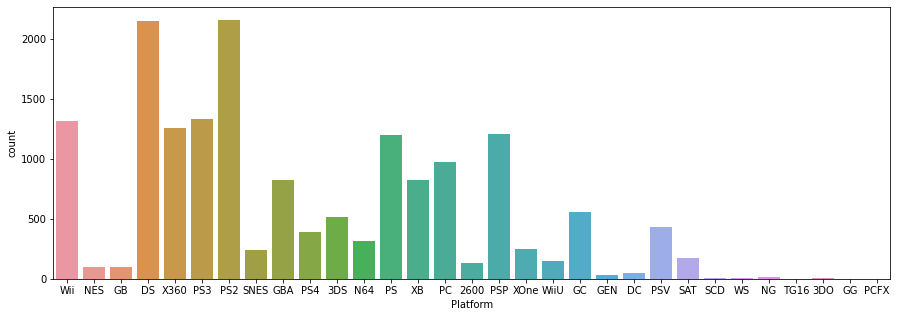

In [8]:
# in the visualization of the platform we can see which consoles are more popular
#from the plot we can see that Ds is the most popular which is portable platforms
# and PS2 is the most popular within the unportable platforms
plt.figure(figsize=(15,5))
chart = sns.countplot(data.Platform)

In [9]:
#inspecting the different type of games produced in volumes
#we can see that the Action games are the most popular ones
data["Genre"].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


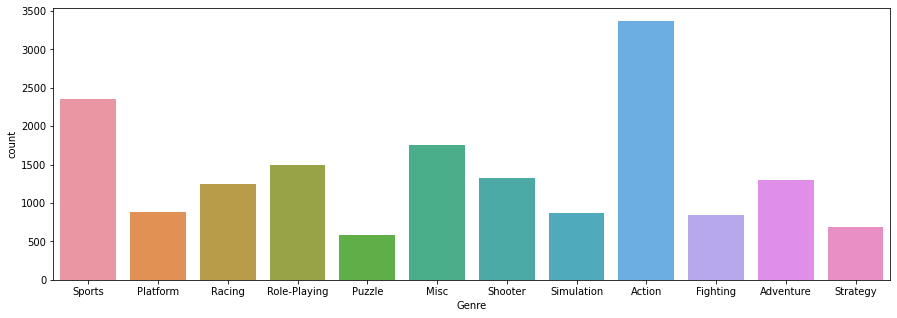

In [10]:
#this plot shows the visualization of the Genre 
plt.figure(figsize=(15,5))
chart = sns.countplot(data.Genre)

In [11]:
data["Year_of_Release"].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

This graph shows a potential issue with the data.

As much as low number of the documented releases in the 80s can be expected due to the lower popularity of gaming.

The lower number of entries towards the 2010 suggests that some of the new games were not added to the database.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


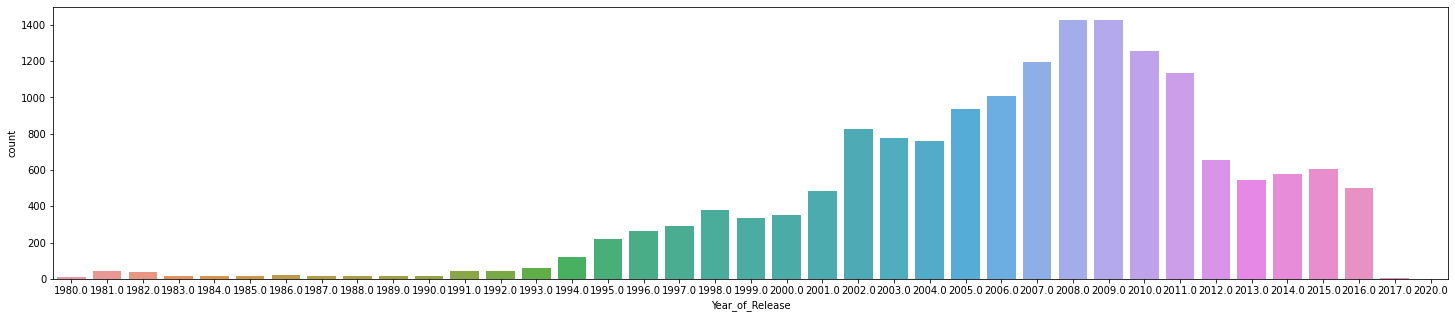

In [12]:
plt.figure(figsize=(25,5))
chart = sns.countplot(data.Year_of_Release)

#Clean the data


This shows the difference between the scales of the features.

Also higher sales of the games can be noted in NA and EU markets (as compared to Japan and the rest of the world).

From this table we can also see the number of entries per column.

The dataset has over 16k entries.

In [13]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


##Unique check

In the next section all the unique variables will be check in order to find potential mistakes in the object columns.


In [14]:
data["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
data["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [16]:
#there are lots of publishers therefore it will not be useful for the analysis 
#dummy variable can`t be created because of it 
data["Publisher"].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',


In [17]:
data["Developer"].unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

In [18]:
# there is a lot of different ratings, but the most important part for us to see
# is whether or not a given game is aimed at younger or more mature audiences
# a binary variable will be created based on this issue later on
data["Rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Wrongly typed variables were found. Therefore it needs a repleacment for NaN.

In [19]:
data= data.replace("nan", np.nan)

In [20]:
data = data.replace("tbd", np.nan)

In [21]:
#detect missing values 
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [22]:
#columns containing less than 10% missing value has been choosen
#the rows containing missing values in those columns were dropped
data = data.dropna(subset = ["Name", "Genre", "Year_of_Release", "Publisher"])
data.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [23]:
#check for unrealistic years
data.sort_values(by = "Year_of_Release", ascending= True)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6301,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.00,0.00,0.27,NaN,NaN,NaN,NaN,NaN,NaN
6876,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.00,0.00,0.24,NaN,NaN,NaN,NaN,NaN,NaN
4019,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.00,0.01,0.49,NaN,NaN,NaN,NaN,NaN,NaN
1764,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15,NaN,NaN,NaN,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16203,The Technomancer,PC,2016.0,Role-Playing,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01,56.0,34.0,6.8,149.0,"Spidersoft, Spiders",M
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


The newest game in the database is suspicious.

According to the database it was released in 2020, but the entries are only supposed to cover the years up until 2017.

Additionally, the data was created in a way where lower index number corresponds to older game.

But this game appears to be really new with a low index number.

Upon a quick google search it can be seen that the information about this game is wrong, so this entry is dropped.


In [24]:
 data=data[data["Year_of_Release"] != 2020]

In [25]:
# no more suspicious years
data.sort_values(by = "Year_of_Release", ascending= False)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16437,Kamigami no Asobi InFinite,PSV,2016.0,Adventure,Broccoli,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05,NaN,NaN,NaN,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76,NaN,NaN,NaN,NaN,NaN,NaN
262,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,NaN,NaN,NaN,NaN,NaN,NaN
5360,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34,NaN,NaN,NaN,NaN,NaN,NaN


##Changing the format

In [26]:
#transform to datetime
data["Year_of_Release"] = pd.to_datetime(data["Year_of_Release"],  format='%Y')
data["Year_of_Release"] =data["Year_of_Release"].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
#since the user score column is an object we have to change it to float 
#in order to be able to apply the machine learnings
data["User_Score"]=data.User_Score.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
#check the change
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16415 non-null  object 
 1   Platform         16415 non-null  object 
 2   Year_of_Release  16415 non-null  int64  
 3   Genre            16415 non-null  object 
 4   Publisher        16415 non-null  object 
 5   NA_Sales         16415 non-null  float64
 6   EU_Sales         16415 non-null  float64
 7   JP_Sales         16415 non-null  float64
 8   Other_Sales      16415 non-null  float64
 9   Global_Sales     16415 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       7461 non-null   float64
 13  User_Count       7461 non-null   float64
 14  Developer        9903 non-null   object 
 15  Rating           9766 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 2.1+ MB


In [29]:
#the coulmn Year_of_Release is an integer 
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#userscore distribution can be seen 
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,16415.000000,7982.000000,7982.000000,7461.000000,7461.000000
mean,2006.489065,0.264129,0.146043,0.078627,0.047672,0.536723,68.997119,26.440992,7.126900,163.008846
std,5.880381,0.819053,0.507148,0.311357,0.188162,1.559931,13.918755,19.009305,1.498886,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2017.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


#Exploratory Data Analysis

##Creating dummy

We transformed the rating into a dummy variable to be able to work with it in the machine learning.

We could do that becuse we made the rating variable into 2 groups under and over 16 games which is covering the rough purpouse of that column.

In [31]:
#true if its 16+ false if its under 16
data["Rating_Dummy"] = np.where(np.logical_or(data["Rating"] == "M", data["Rating"] == "AO"), True, False)
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rating_Dummy
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,False
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,False
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,False
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,False
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,False
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,False
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,False


##Platforms across the years

In [32]:
#which platforms were popular in different years
platform_by_year = pd.crosstab(data["Year_of_Release"], data["Platform"])
platform_by_year

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year_of_Release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1982,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1983,11,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1984,1,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1985,1,0,0,0,1,0,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986,2,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987,6,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1988,2,0,0,0,0,1,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We can see that the different platforms were popular for a relative short period of time(5-10years).

Except the PC which it does not have the steep curve(It is popular since 40+ years).

It is especially interesting to see the rapid, but short spike in the popularity of DS.

The graph is fairly difficult to read.
Further on a graph portraying only some chosen platforms will be presented.

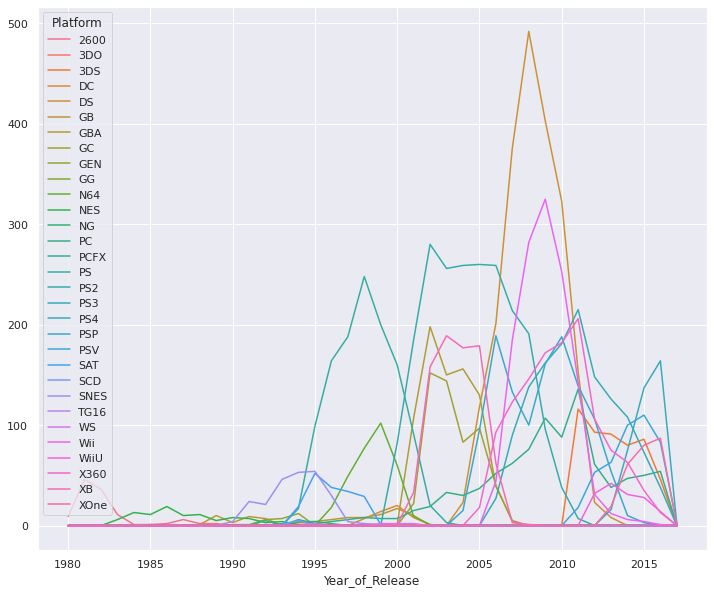

In [33]:
#visualization for the popular platforms year by year
sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(data = platform_by_year, dashes=False)

##Search through the dataset

In [34]:
#this part of the analysis shows the search through the dataset 
#it show the bests user scored games in the year 2000
#which is whithin the transportable platforms Skies of Arcadia role playing game was
#and within the non trasportable platforms the Deus Ex role playing game was
data[data["Year_of_Release"] == 2000 ].sort_values(by = "User_Score", ascending= False).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rating_Dummy
10999,Skies of Arcadia,DC,2000,Role-Playing,Sega,0.0,0.00,0.09,0.00,0.09,93.0,21.0,9.4,98.0,Overworks,T,False
16355,Deus Ex,PC,2000,Role-Playing,Eidos Interactive,0.0,0.01,0.00,0.00,0.01,90.0,28.0,9.3,1069.0,Ion Storm,M,True
7521,Phantasy Star Online,DC,2000,Role-Playing,Sega,0.0,0.00,0.20,0.00,0.20,89.0,21.0,9.1,33.0,Sonic Team,T,False
438,Spider-Man,PS,2000,Action,Activision,1.7,1.25,0.02,0.16,3.13,87.0,19.0,9.0,107.0,Neversoft Entertainment,E,False
7231,Capcom vs. SNK,DC,2000,Fighting,Virgin Interactive,0.0,0.00,0.22,0.00,0.22,80.0,17.0,9.0,24.0,Capcom,T,False


In [35]:
# search the most sold game globaly in the year 2000
# which is led by pokemon in the GB platform 
# followed by many ps games in different categories
data[data["Year_of_Release"] == 2000 ].sort_values(by = "Global_Sales", ascending= False).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rating_Dummy
133,Pokémon Crystal Version,GB,2000,Role-Playing,Nintendo,2.55,1.56,1.29,0.99,6.39,NaN,NaN,NaN,NaN,NaN,NaN,False
175,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,2.78,0.14,5.30,94.0,22.0,8.9,779.0,SquareSoft,T,False
223,Driver 2,PS,2000,Action,Atari,2.36,2.10,0.02,0.25,4.73,62.0,14.0,7.7,92.0,Reflections Interactive,T,False
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68,98.0,19.0,7.7,299.0,Neversoft Entertainment,T,False
244,Dragon Quest VII: Warriors of Eden,PS,2000,Role-Playing,Enix Corporation,0.20,0.14,4.10,0.02,4.47,NaN,NaN,NaN,NaN,NaN,NaN,False


##Creating new dataset for analysis

After the data been checked. (Assuming that the producers would make more games for popular ones.) We decided to work on the most popular non-portable platforms which are: "PS","PS2","PS3","PS4","PC","X360","XOne","Wii".

In [36]:
popular_platforms=data.loc[data["Platform"].isin(["PS","PS2","PS3","PS4","PC","X360","XOne","Wii"])]
popular_platforms.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rating_Dummy
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,False
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,False
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,False
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,False
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,False


Interesting to see, that all the other consoles have short-lasting, although high peaks.

Whereas PC does not have any comparable peak, but it was consistently used since the late 80s.

The graph captures the nature of Wii very well - it is the highest and the sharpest peak.
It can be connected to the rapid and short lasting popularity of this platform.

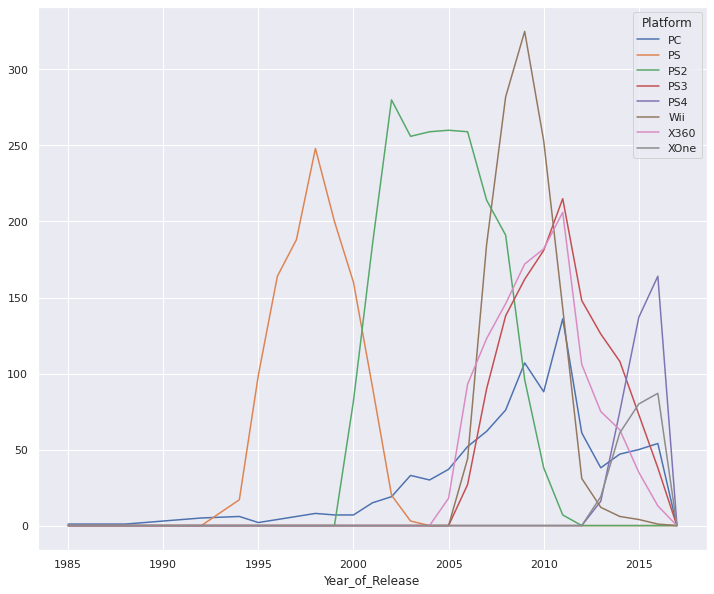

In [37]:
#check out the crosstab for the popular platform data
platform_by_year1 = pd.crosstab(popular_platforms["Year_of_Release"], popular_platforms["Platform"])
#same graph like before but for the choosen platforms
sns.set(rc={'figure.figsize':(12,10)})
sns.lineplot(data = platform_by_year1, dashes=False)

In [38]:
#it shows in which platform what kind of games were released in this period
#we can see that the Racing, Action, Sports and Roleplaying games were mostly released
platform_genre = pd.crosstab(popular_platforms["Genre"], popular_platforms["Platform"])
platform_genre

Platform,PC,PS,PS2,PS3,PS4,Wii,X360,XOne
Genre,,,,,,,,
Action,166,154,345,373,144,229,317,85
Adventure,65,67,196,72,28,82,48,14
Fighting,5,108,146,76,18,41,65,7
Misc,22,76,218,122,20,272,123,19
Platform,11,64,101,36,12,57,25,5
Puzzle,25,32,18,2,1,54,6,0
Racing,57,144,212,90,19,91,101,20
Role-Playing,103,97,183,117,52,35,75,14
Shooter,147,96,158,155,41,61,197,38



Lighter fields mean, that more games of a particular type was created.

This graph allows to see which Platform/Genre combinations are more popular faster than the crosstab.

However, the crosstab allows us to examine the number exactly.

On the heatmap we can see that a particularly popular Genre/Console combination are sports games on PS2.


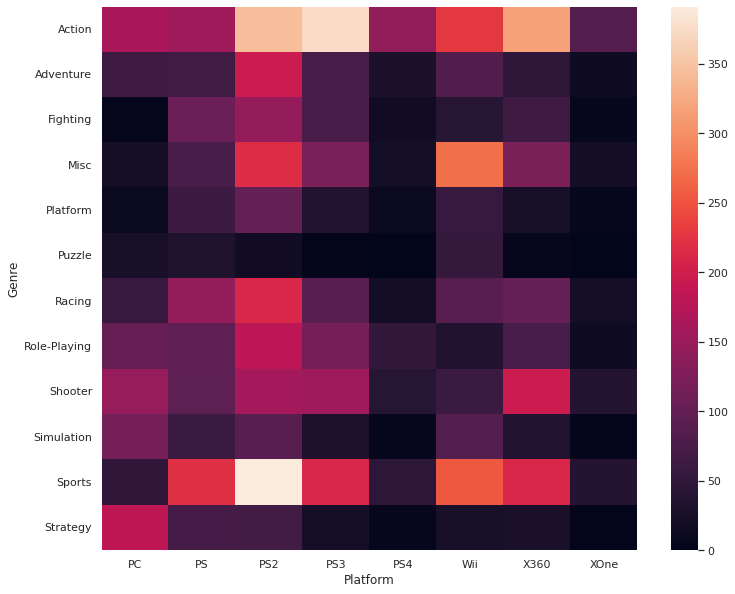

In [39]:
#This illustration shows the different genre produced for the different platforms
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data = platform_genre)

In [40]:
#we can see that ps2 games were most sold globally
global_sales=popular_platforms.groupby('Platform')["Global_Sales"].sum()
global_sales

Platform
PC       256.21
PS       727.41
PS2     1233.46
PS3      931.15
PS4      314.23
Wii      891.74
X360     961.39
XOne     159.44
Name: Global_Sales, dtype: float64

In [41]:
#we create a dataframe to be able to make the barplot
global_sales=pd.DataFrame(global_sales)

In [42]:
global_sales=global_sales.reset_index()
global_sales

,Platform,Global_Sales
0,PC,256.21
1,PS,727.41
2,PS2,1233.46
3,PS3,931.15
4,PS4,314.23
5,Wii,891.74
6,X360,961.39
7,XOne,159.44


The global sales across the popular platforms show the overwhelming popularity of PS consoles as compared to the alternatives.

This popularity can be further underlined if we recall the sales across platforms before the exclusion of less popular and portable consoles.

The 6th most popular platform in terms of released games was the PlayStation Portable console.

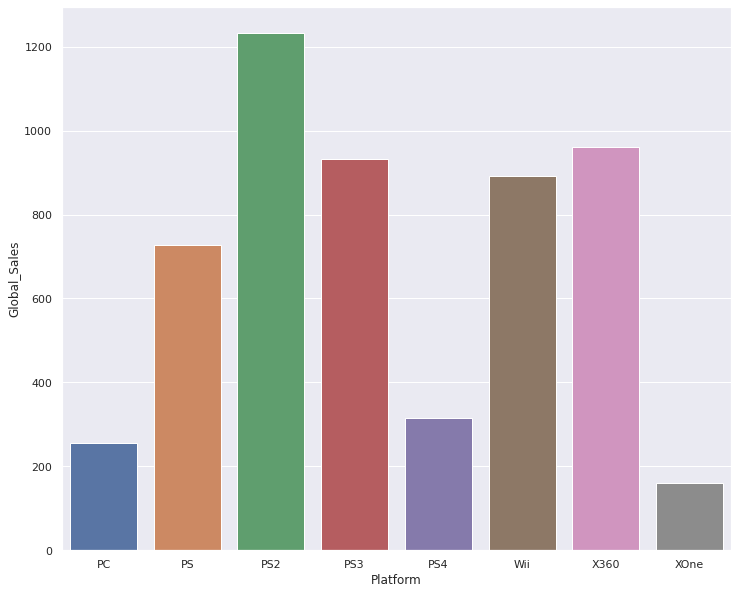

In [43]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(data=global_sales, x="Platform", y="Global_Sales")

In [44]:
#we can see the geographical distribution of the Global_Sales data
#where North_America and EU had most of the sales from the global scale
sales=popular_platforms.groupby('Platform')['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales'].sum()
sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,EU_Sales,NA_Sales,JP_Sales,Other_Sales
Platform,,,,
PC,140.08,93.28,0.17,21.88
PS,212.39,334.72,139.78,40.69
PS2,332.63,572.92,137.54,190.47
PS3,327.21,390.13,79.41,134.59
PS4,141.09,108.74,16.00,48.35
Wii,258.32,486.87,68.28,77.71
X360,268.32,595.74,12.30,84.88
XOne,51.59,93.12,0.34,14.27


Particularly Xbox360 and PS2 noted high sales.

It is important to mention, that the data concerning PS4 anf XboxOne can be skewed.

Those consoles were still fairly new at the time of the creation of this dataset so not as many games were released for them yet.

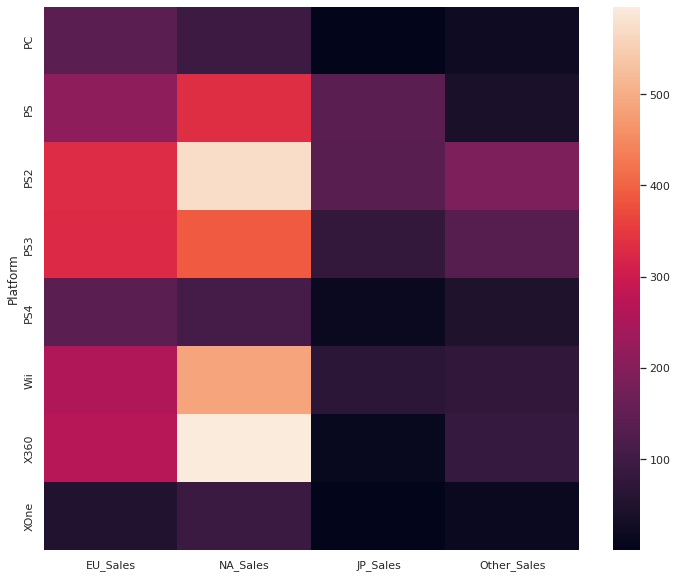

In [45]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data = sales)

#Unsupervised Machine Learning

In [46]:
# re-inspecting the data in order to choose the parameters that can be useful in UML
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rating_Dummy
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,False
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,False
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,False
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,False


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16415 non-null  object 
 1   Platform         16415 non-null  object 
 2   Year_of_Release  16415 non-null  int64  
 3   Genre            16415 non-null  object 
 4   Publisher        16415 non-null  object 
 5   NA_Sales         16415 non-null  float64
 6   EU_Sales         16415 non-null  float64
 7   JP_Sales         16415 non-null  float64
 8   Other_Sales      16415 non-null  float64
 9   Global_Sales     16415 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       7461 non-null   float64
 13  User_Count       7461 non-null   float64
 14  Developer        9903 non-null   object 
 15  Rating           9766 non-null   object 
 16  Rating_Dummy     16415 non-null  bool   
dtypes: bool(1), 

##Pairplot

Pairplot is shown in here colored by genre.
It shows a pair wise comperison betwen the data.

Fist plot shows the years of released which was mostly after 2000 the plot under shows that most of the user account and scores were estabilished in this period.

Moreover the sales are distributed between 1990 and 2016 evenly which is interesting.

On the histograms we can also see a high number of outliers for some of the variables such as: sales and scores.

Otherwise, the distributions seem close to normal, with a fairly high mean and low standard deviation.

The outliers are also visible on the scatter plots.

The scatter plots also allow us to see the correlations occuring between any two numeric variables.

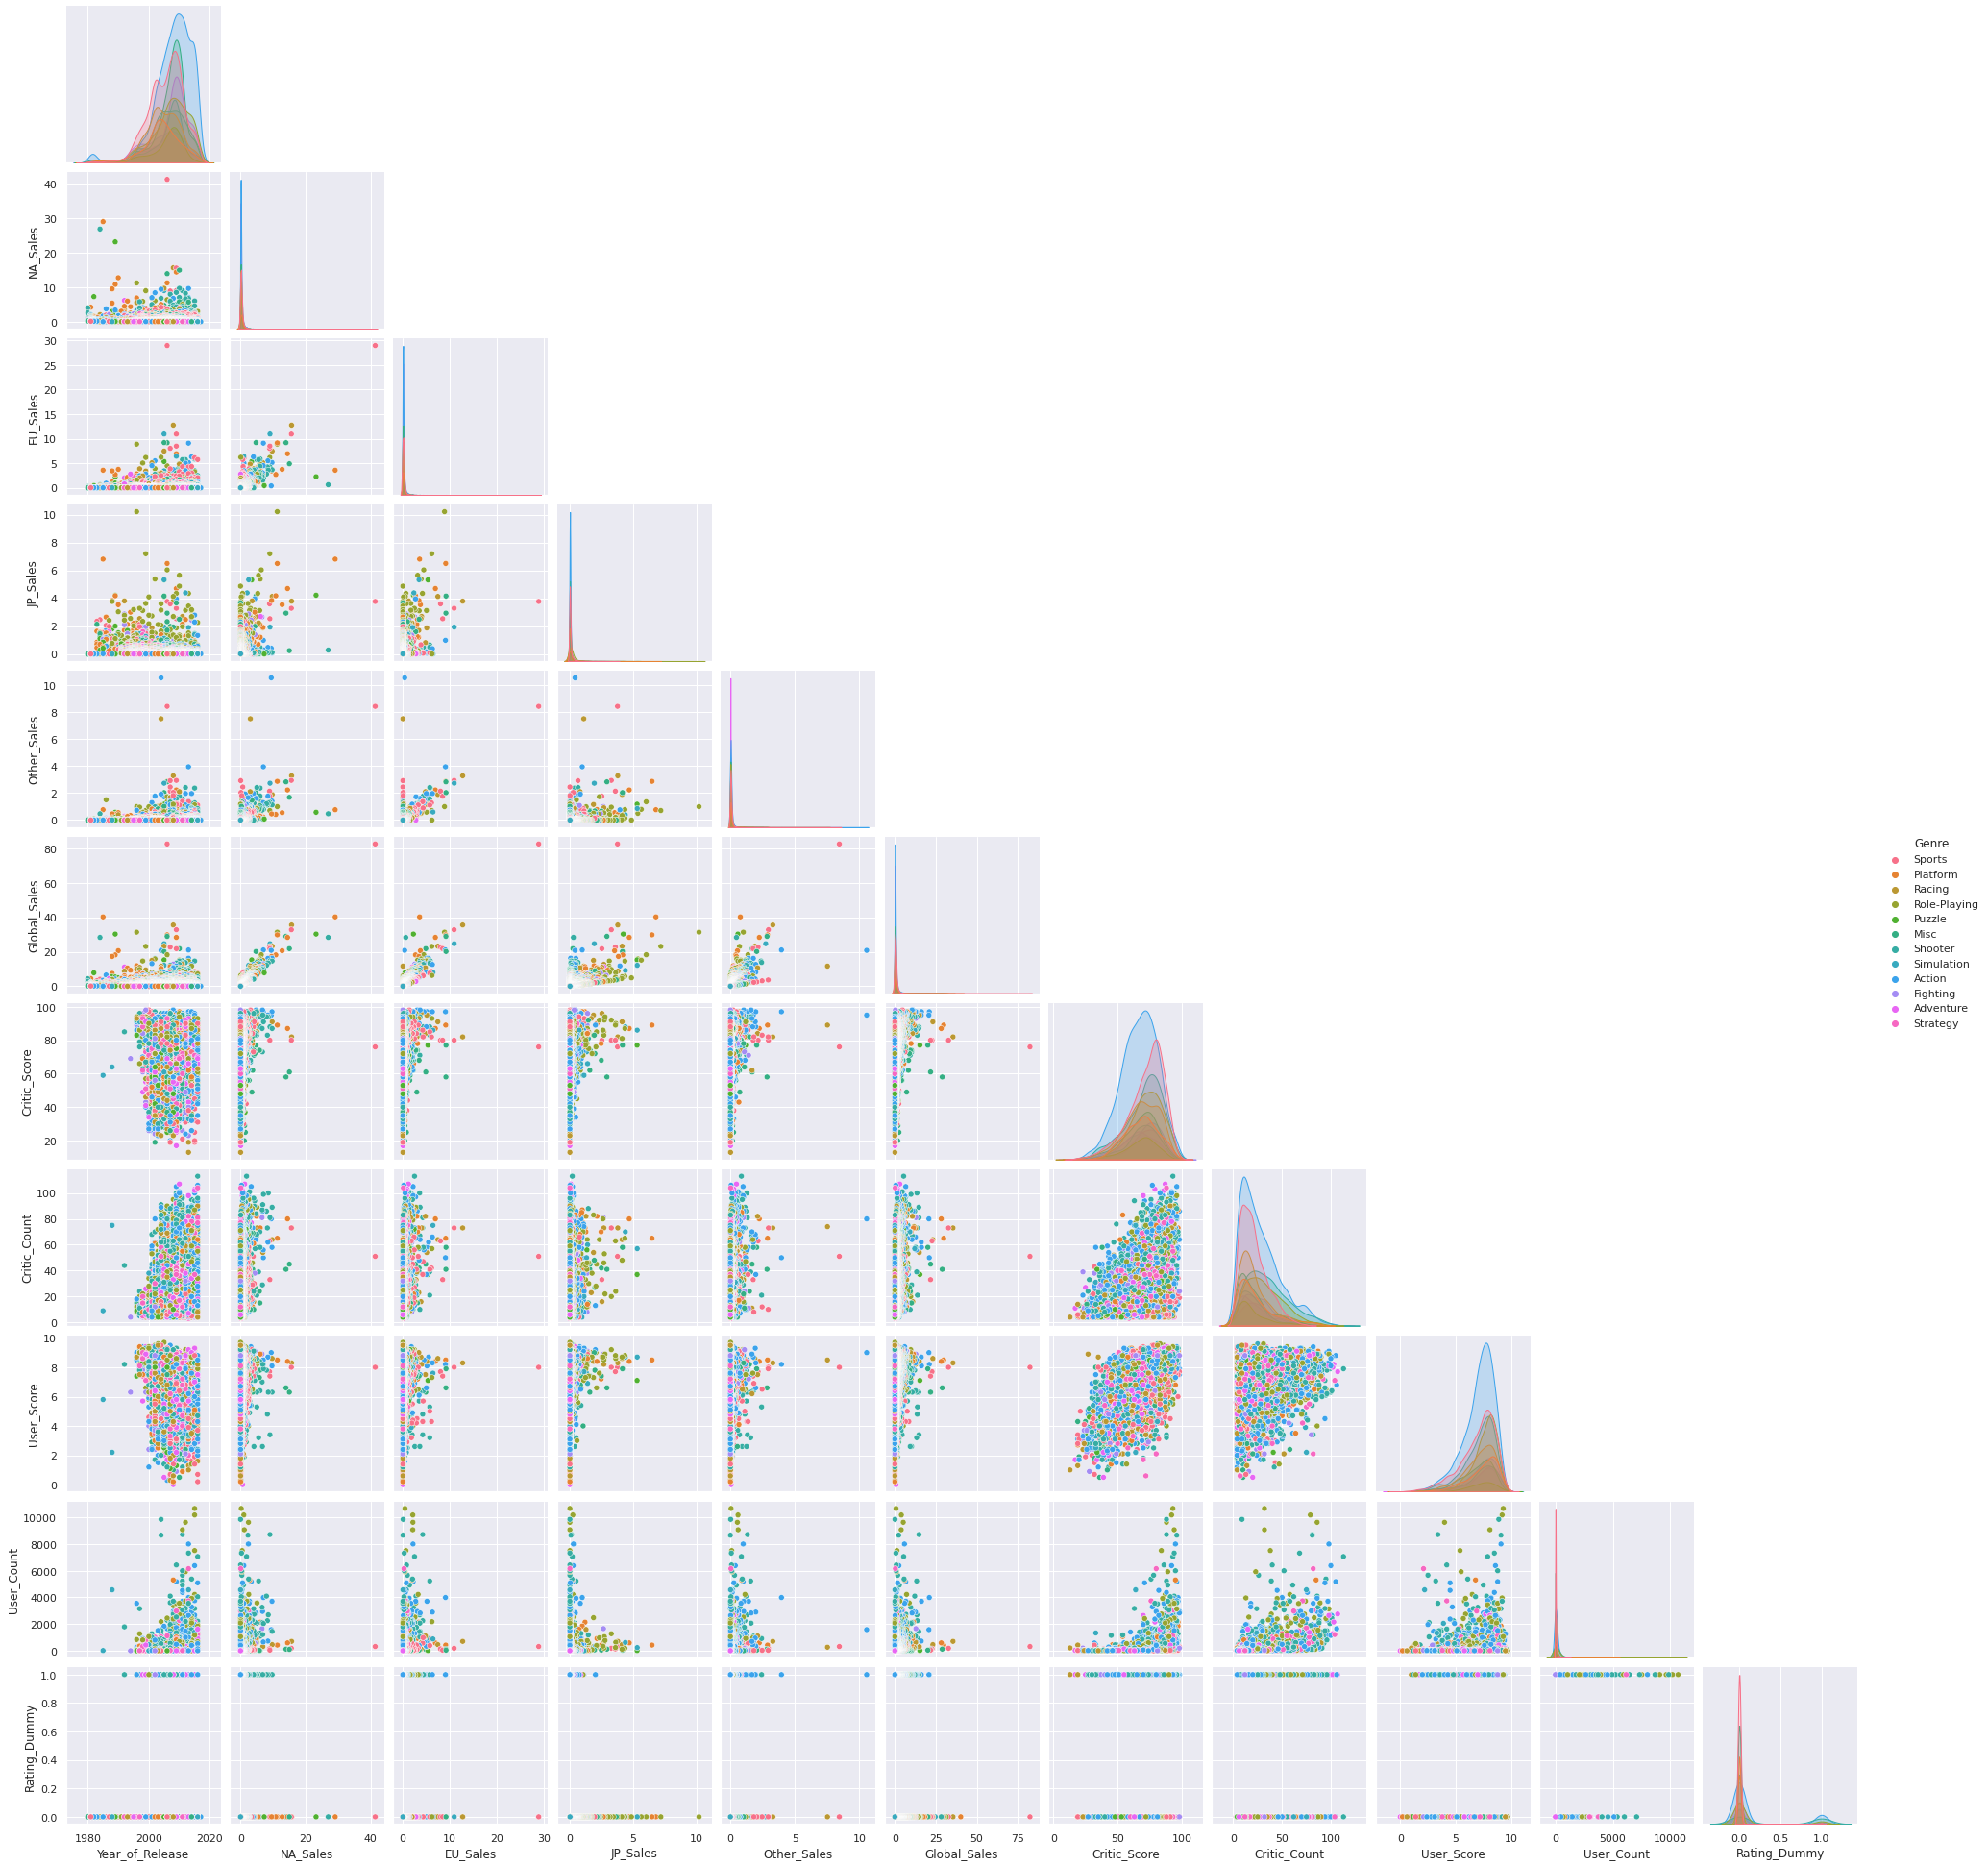

In [48]:
sns.pairplot(data, corner=True, hue="Genre")

##Imputing and Scaling

As we can recall from the data exploration, Critic_Score, Critic_Count, User_Score and User_Count had many values missing.

Removing the missing values from the before mentioned columns would result in losing a lot of valid data.

Therefore, we will use an imputer in order to replace the missing values in those coulmns with a mean value


In [49]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [50]:
# Pick the column which are numeric, fit to data and transform it back to data
data.iloc[:,[2,5,6,7,8,9,10,11,12,13]] = imp.fit_transform(data.iloc[:,[2,5,6,7,8,9,10,11,12,13]])

As could be seen during the initial data exploration, the scales of the columns varied greatly.

Since the pairplot showed a high number of outliers we decided to use RobustScaler, as it is better at preserving the original shape of the data, while equalizing the mean and standard deviation.

We have decided to include the year of release in the normalization.

We are not using it for indexing, but instead as a variable that can carry information about a particular entry due to the change in popularity of video games across time.


In [51]:
data.iloc[:,[2,5,6,7,8,9,10,11,12,13]]=RobustScaler().fit_transform(data.iloc[:,[2,5,6,7,8,9,10,11,12,13]])

In [52]:
#no missing values for the nummeric columns
data.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6512
Rating             6649
Rating_Dummy          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

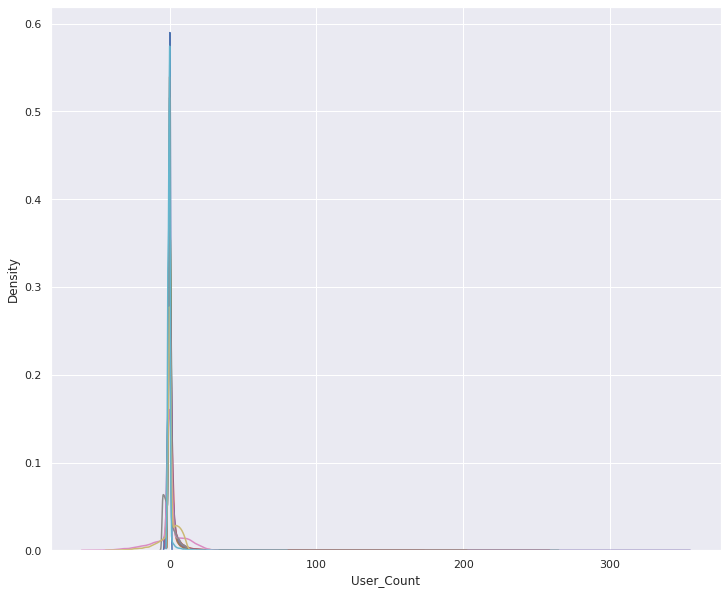

In [53]:
#it does not have any column names because we did not put back into the data yet
#and it shows that we kept all the outliers and it centered around its mean
#the data is centered around the same point with similar standard deviation
#but the original shape with the outliers can still be seen
for i in range(10):
  sns.distplot(data.iloc[:,[2,5,6,7,8,9,10,11,12,13]].iloc[:,i], hist = False, label = list(data.iloc[:,[2,5,6,7,8,9,10,11,12,13]].columns)[i])

In [54]:
#scaling worked
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rating_Dummy
0,Wii Sports,Wii,-0.142857,Sports,Nintendo,172.000000,263.090909,94.25,281.333333,200.878049,6.982761,5.530072,5.043902,1.195343,Nintendo,E,False
1,Super Mario Bros.,NES,-3.142857,Platform,Nintendo,120.833333,32.363636,170.25,25.333333,97.731707,0.000000,0.000000,0.000000,0.000000,NaN,NaN,False
2,Mario Kart Wii,Wii,0.142857,Racing,Nintendo,65.000000,115.818182,94.75,109.333333,86.219512,12.965522,10.483920,6.777003,4.104924,Nintendo,E,False
3,Wii Sports Resort,Wii,0.285714,Sports,Nintendo,64.708333,99.181818,82.00,98.000000,79.512195,10.971268,10.483920,5.043902,0.217964,Nintendo,E,False
4,Pokemon Red/Pokemon Blue,GB,-1.571429,Role-Playing,Nintendo,46.625000,80.636364,255.50,33.000000,76.097561,0.000000,0.000000,0.000000,0.000000,NaN,NaN,False


In [55]:
# we take out the global sales because it duplicates the sales
# it is constructed as the sum of the four other sales categories
# but it carries less information

# we are also removing Developer, as there is too many of them to efficiently 
#use them as dummy variable

# additionally, we are removing Rating as the Rating_Dummy will be used instead
data.drop(["Global_Sales","Developer","Rating"],axis=1, inplace=True)

In [56]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating_Dummy
0,Wii Sports,Wii,-0.142857,Sports,Nintendo,172.000000,263.090909,94.25,281.333333,6.982761,5.530072,5.043902,1.195343,False
1,Super Mario Bros.,NES,-3.142857,Platform,Nintendo,120.833333,32.363636,170.25,25.333333,0.000000,0.000000,0.000000,0.000000,False
2,Mario Kart Wii,Wii,0.142857,Racing,Nintendo,65.000000,115.818182,94.75,109.333333,12.965522,10.483920,6.777003,4.104924,False
3,Wii Sports Resort,Wii,0.285714,Sports,Nintendo,64.708333,99.181818,82.00,98.000000,10.971268,10.483920,5.043902,0.217964,False
4,Pokemon Red/Pokemon Blue,GB,-1.571429,Role-Playing,Nintendo,46.625000,80.636364,255.50,33.000000,0.000000,0.000000,0.000000,0.000000,False


In [57]:
#data is clean from missing values and ready for UML
data.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating_Dummy       0
dtype: int64

##Spreadsheet of explained variance vs the number of PC

In [58]:
#data_n is created from the nummerical variables
data_n=data.iloc[:,[2,5,6,7,8,9,10,11,12,13]]

Making a spreadsheet to show how much variance is explained by each dimension.

It can be seen, that the third dimension still explains a significant portion.

Inclusion of the third dimension also allows the explained varaince to reach above 80%, which can be used as a rule of thumb to determine, that it is a good choice of dimensions.


In [59]:
pca_sheet= PCA()
pca_sheet.fit(data_n)
explained_variance = pca_sheet.explained_variance_ratio_*100
explained_variance = pd.DataFrame(explained_variance)
explained_variance

,0
0,41.852054
1,27.062946
2,13.614788
3,8.126733
4,3.151547
5,2.767356
6,1.941785
7,1.226420
8,0.229843
9,0.026527


In [60]:
#we are creating a PCA with 3 components because the first 3 explain 80%
pca = PCA(n_components=3)
data_pca = pca.fit(data_n)

we have to use fit and transform seperately because its only possible to check the explained variance ratio before the data is being transformed.

In [61]:
# as expected - over 80% of the variablity is explained
sum(data_pca.explained_variance_ratio_)

0.8252978813687287

In [62]:
# we us linear transformation to be able to do scalar projections in the future 
data_pca = pca.transform(data_n)

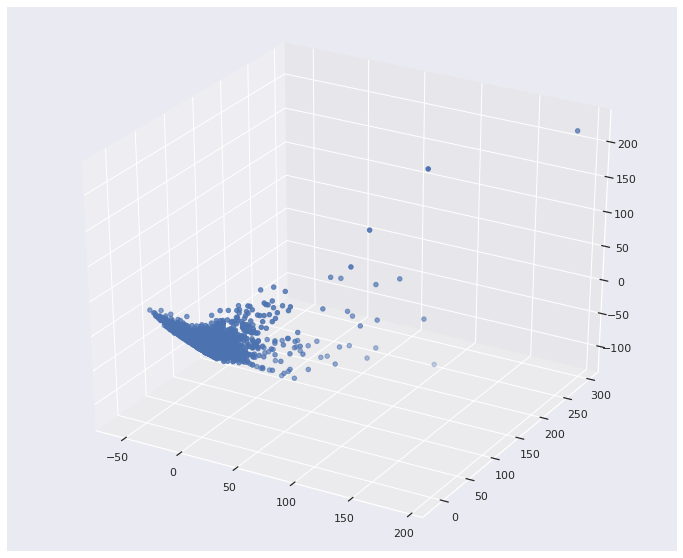

In [63]:
# in 3D - does not seem to improve the readability of the data
# the 2d version will be presented further on
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(data_pca[:,0], data_pca[:,1], data_pca[:,2])
plt.show()

## Dimensionality reduction for the whole data

In [64]:
# pca with only two components explains less varibility
# however since we are using it to provide a graphical representation of the data
# the two dimensions seem to be the right choice
pca = PCA(n_components=2)
data_pca = pca.fit(data_n)

In [65]:
# it shows us the veritcal spread of the regression
# still, nearly 70% of the variability is explained
sum(data_pca.explained_variance_ratio_)

0.6891500058317024

In [66]:
data_pca = pca.transform(data_n)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


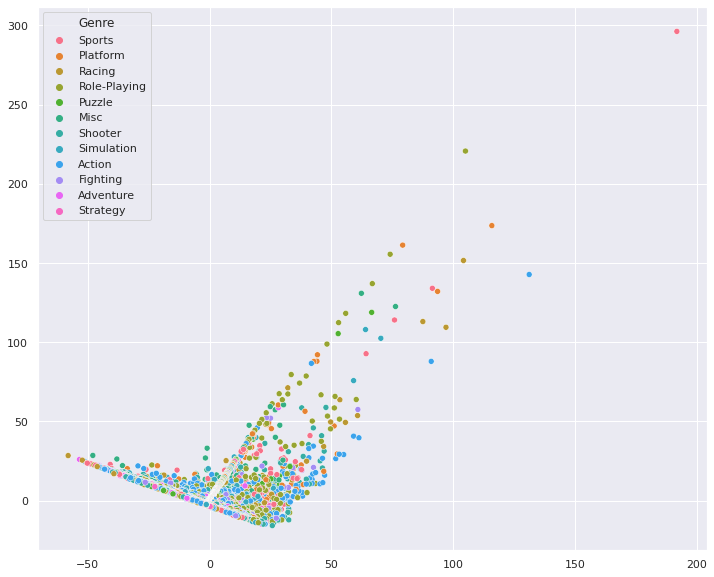

In [67]:
# the data was colored by genre - no significant pattern can be noticed
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue = data['Genre'] )

##Creating vectors to improve understanding

As PCA is based on creating new vectors that best descriabe the variance present in the original data.

It is possible to inspect how the database features relate to the primary component axes.


In [68]:
pca_vec = pca.fit(data_n)

In [69]:
pca_fig = pca.fit(data_n)

As can be seen on the plot, User_Count, Critic_Count, Year_of_Release and Rating_Dummy 
don't have a significant impact on the shape of the plot.

All the other features increase along the X axis.

The sales increase along the y axis, whereas the scores decrease.

More data points are closer to the EU and NA sales which is not a supprise since it had a higher sales.


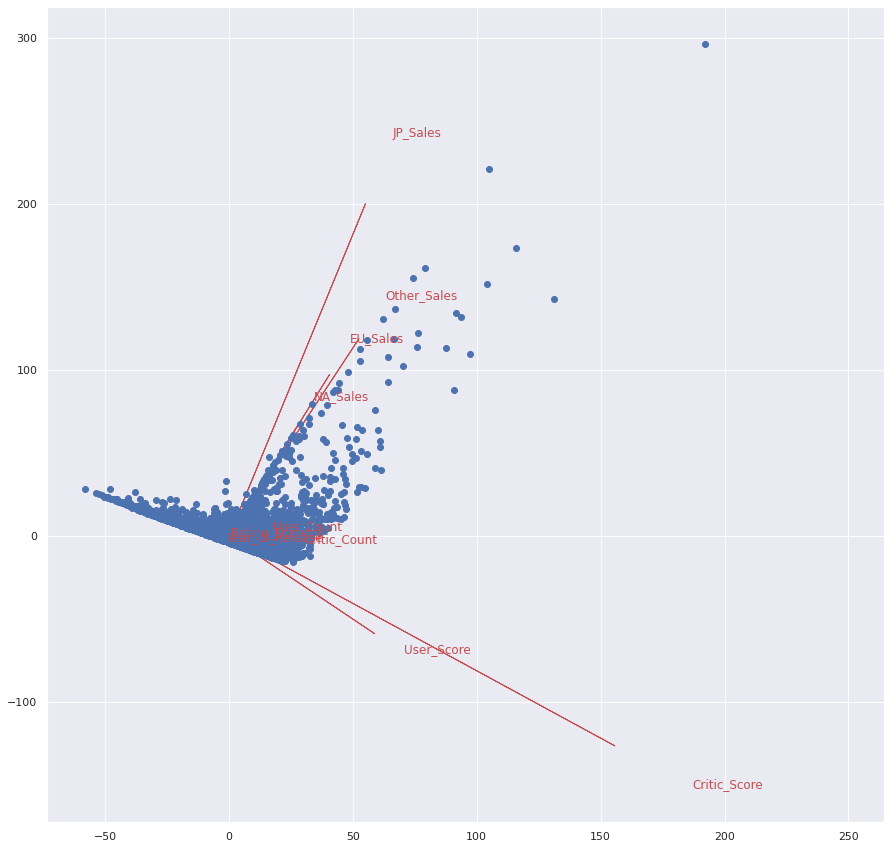

In [70]:
#setting up the figure 
plt.figure(figsize = (15,15))
xvector = pca_fig.components_[0]
yvector = pca_fig.components_[1]
xs = pca_fig.transform(data_n)[:,0]
ys = pca_fig.transform(data_n)[:,1]
for i in range(len(xvector)):
# arrows show features as vectors on the PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(data_n.columns.values)[i], color='r')
for i in range(len(xs)):
# circles show the original scatter plot of the PCA
    plt.plot(xs[i], ys[i], 'bo')

plt.plot(range(-150,100), alpha = 0)
plt.show()

##UMAP for the whole data

In [71]:
#Create UMAP
umap_reducer = umap.UMAP()

In [72]:
data_umap = umap_reducer.fit_transform(data_n)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Umap does not allow to see, how the new datapoints relate to the original dimension.

However it relies on the relations between the points, which allows to see the local structure of the database.

Here one large cluster can be seen with many small clusters and singular points surrounding it.

Coloring by the genre does not seem to show any pattern.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


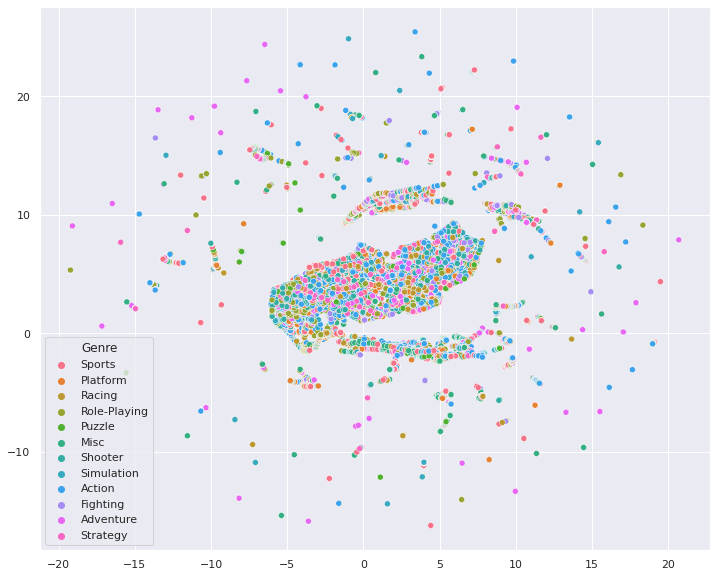

In [73]:
sns.scatterplot(data_umap[:,0], data_umap[:,1], hue = data['Genre'] )

##Kmeans clustering using inertia

The number of clusters in K-means clustering can be determined through measuring the inertia (variablity) that is added with the increase in dimension.

The point where the increased number of dimensions only creates a small increase in variance explained is called an "elbow".


In [74]:
inertia = []
K = range(1,11)
for k in K:
    kmeanModel_data = KMeans(n_clusters=k)
    kmeanModel_data.fit(data_n)
    inertia.append(kmeanModel_data.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


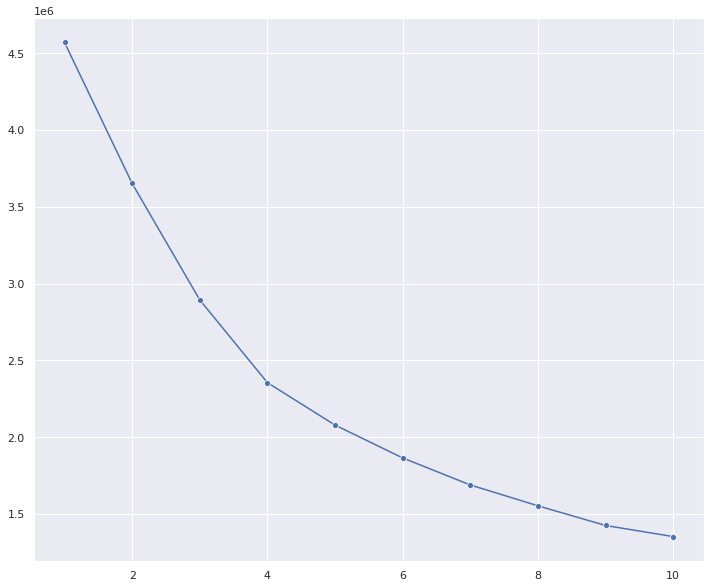

In [75]:
# the elbow is not very clear it can be seen on four clusters
sns.lineplot(K, inertia, marker="o")

In [76]:
clusterer_data = KMeans(n_clusters=4)
clusterer_data.fit(data_n)

KMeans(n_clusters=4)

Outside of the number of clusters, the default settings were used. The Kmeans function runs the algorithm 10 times in order to determine if the best centers were chosen. The maximum number of iterations for a single initial center of 300 were chosen. Together with the default center initiation method, choosing the centers in a non-random way that is meant to speed up the convergence in order to allow the finding of the optimal clusters.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


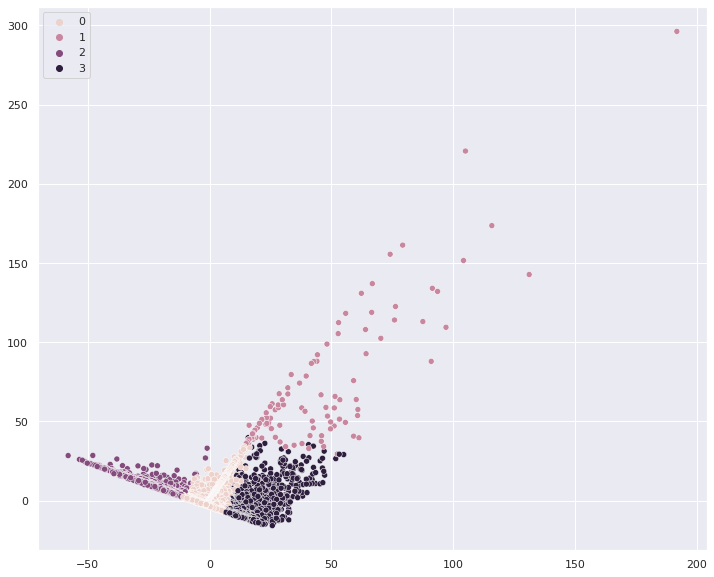

In [77]:
# the PCA plot colored by the four clusters shows very few points that overlap 
# with different color areas
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue = clusterer_data.labels_ )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


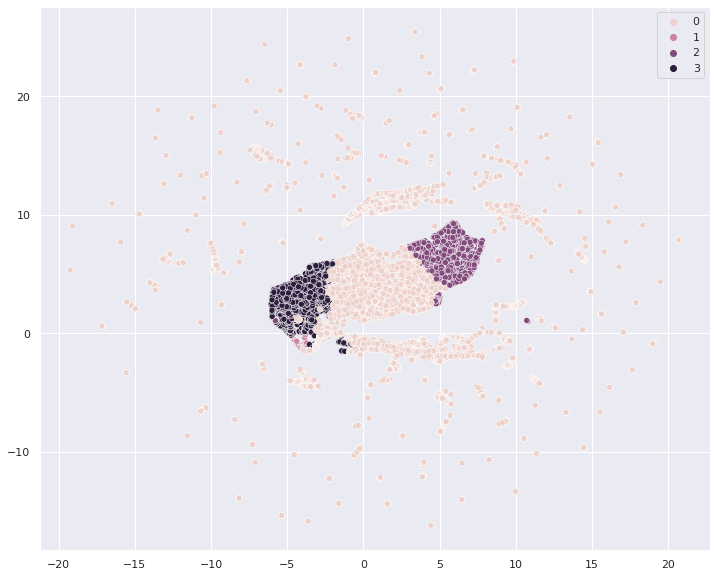

In [78]:
# that is less of a case for UMAP, where cluster 3 is located in different places
sns.scatterplot(data_umap[:,0], data_umap[:,1], hue = clusterer_data.labels_ )

In [79]:
# the clusters don't seem to separate the genres
# cluster 3 is considerably smaller, than the others
pd.crosstab(clusterer_data.labels_, data['Genre'])

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
row_0,,,,,,,,,,,,
0,2286,1125,605,1428,611,472,826,1047,746,680,1597,521
1,8,1,5,9,15,3,10,38,4,4,8,0
2,497,88,83,126,112,48,169,87,180,68,199,36
3,516,77,144,134,140,46,220,311,366,102,502,115


##Kmeans clustring using silhuette

Another method that can be used to determine the number of clusters in Kmeans clustering is silhoutte score

In [80]:
# it is constructed based on each points proximity to the nearest cluster
silhouette = []
N = [2,3,4,5,6,7,8,9]
for n in N:
    clust = KMeans(n_clusters=n)
    clust_labels = clust.fit_predict(data_n)
    silhouette.append(silhouette_score(data_n, clust_labels))

In [81]:
silhouette = pd.DataFrame(silhouette, index=[2,3,4,5,6,7,8,9])
silhouette = silhouette.reset_index()
silhouette.columns = ["n_clusters", "silhouette_score"]
silhouette

,n_clusters,silhouette_score
0,2,0.479660
1,3,0.508072
2,4,0.484796
3,5,0.490675
4,6,0.478119
5,7,0.481387
6,8,0.465833
7,9,0.478269


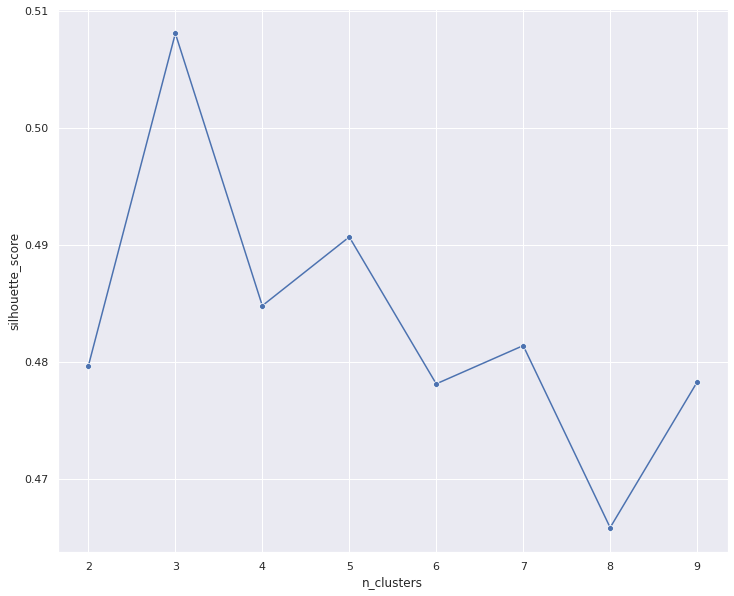

In [82]:
# we are looking out for the last point before a significant drop in the silhouette score
# this corresponds to the points having lowest distances to the respective clusters
#here the number of clusters appears to be three
sns.lineplot(data = silhouette, x = "n_clusters", y = "silhouette_score", marker = "o")

In [83]:
#using 3 clusters
clusterer2_data = KMeans(n_clusters=3)
clusterer2_data.fit(data_n)

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


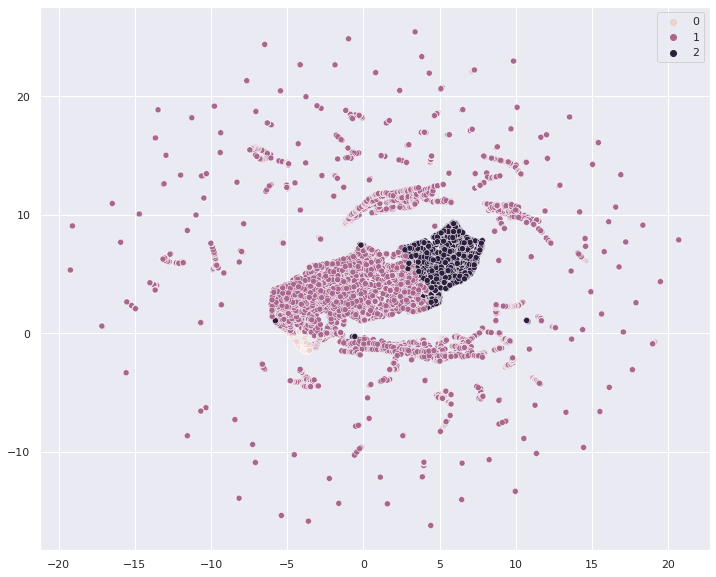

In [84]:
#data is still not clustered perfectly because there are outliers 
sns.scatterplot(data_umap[:,0], data_umap[:,1], hue = clusterer2_data.labels_ )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


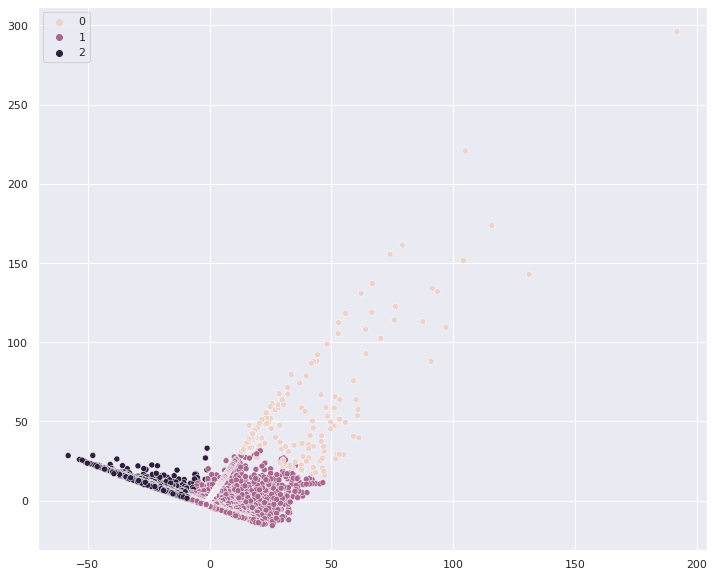

In [85]:
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue = clusterer2_data.labels_ )

In [86]:
# cluster 2 is the smallest this time, no significant pattern can be noticed
pd.crosstab(clusterer2_data.labels_, data['Genre'])

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
row_0,,,,,,,,,,,,
0,21,1,8,11,24,5,11,44,13,4,15,0
1,2662,1179,725,1525,707,507,999,1320,1061,763,2035,616
2,624,111,104,161,147,57,215,119,222,87,256,56


##Hierarchical clustering

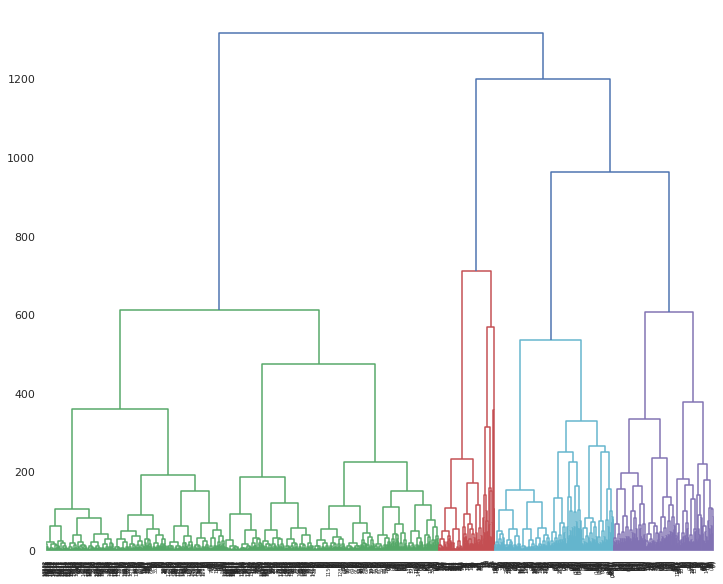

In [87]:
#since after y=800 we have 4 lines thats why we choose 4 clusters in the hierarchical clustering
# y=800 is roughly the middle of the longest not interupted branch of the dendrogram
# ward linkage was used as it is the most likely to create clusters with the lowest variance
link = linkage(data_n,  "ward")
dendrogram(link, orientation='top', distance_sort='descending', truncate_mode="level", p = 10,)
plt.show()

In [88]:
agg_clust = AgglomerativeClustering(n_clusters = 4, linkage="ward")

In [89]:
agg_clust.fit(data_n)

AgglomerativeClustering(n_clusters=4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


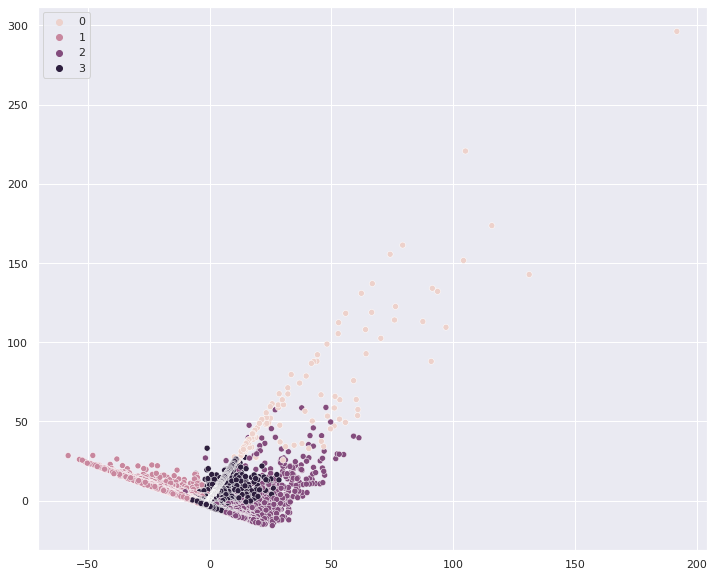

In [90]:
# the results are very similar to the four clusters with Kmeans
sns.scatterplot(data_pca[:,0], data_pca[:,1], hue = agg_clust.labels_ )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


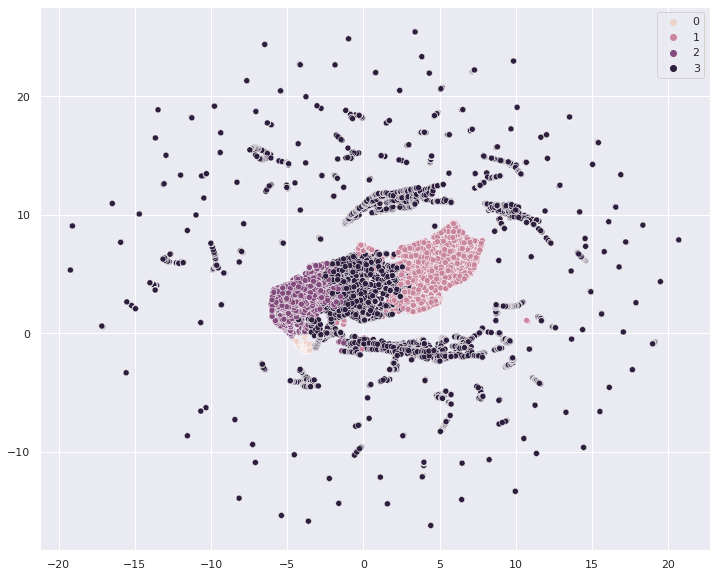

In [91]:
sns.scatterplot(data_umap[:,0], data_umap[:,1], hue = agg_clust.labels_ )

In [92]:
#the results are similar to Kmeans clustering
pd.crosstab(agg_clust.labels_, data['Genre'])

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
row_0,,,,,,,,,,,,
0,10,2,5,8,18,5,10,42,0,6,10,1
1,852,154,145,200,194,88,289,178,302,125,362,84
2,465,81,132,126,140,44,205,285,352,95,457,115
3,1980,1054,555,1363,526,432,721,978,642,628,1477,472


##Dimensionality reduction for selected data 

We applied the same process as above therefore we will not explain the process, and compare the final results.

In [93]:
data_n_popular= data.loc[data["Platform"].isin(["PS","PS2","PS3","PS4","PC","X360","XOne","Wii"])]
data_n_popular.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating_Dummy
0,Wii Sports,Wii,-0.142857,Sports,Nintendo,172.000000,263.090909,94.25,281.333333,6.982761,5.530072,5.043902,1.195343,False
2,Mario Kart Wii,Wii,0.142857,Racing,Nintendo,65.000000,115.818182,94.75,109.333333,12.965522,10.483920,6.777003,4.104924,False
3,Wii Sports Resort,Wii,0.285714,Sports,Nintendo,64.708333,99.181818,82.00,98.000000,10.971268,10.483920,5.043902,0.217964,False
7,Wii Play,Wii,-0.142857,Misc,Nintendo,57.833333,83.272727,73.25,94.333333,-10.965522,3.278323,-3.043902,-0.255689,False
8,New Super Mario Bros. Wii,Wii,0.285714,Platform,Nintendo,59.833333,62.909091,117.50,74.333333,17.951156,12.060144,7.354704,3.240319,False


In [94]:
data_n_popular=data_n_popular.iloc[:,[2,5,6,7,8,9,10,11,12,13]]


In [95]:
data_n_popular.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating_Dummy
0,-0.142857,172.000000,263.090909,94.25,281.333333,6.982761,5.530072,5.043902,1.195343,False
2,0.142857,65.000000,115.818182,94.75,109.333333,12.965522,10.483920,6.777003,4.104924,False
3,0.285714,64.708333,99.181818,82.00,98.000000,10.971268,10.483920,5.043902,0.217964,False
7,-0.142857,57.833333,83.272727,73.25,94.333333,-10.965522,3.278323,-3.043902,-0.255689,False
8,0.285714,59.833333,62.909091,117.50,74.333333,17.951156,12.060144,7.354704,3.240319,False


In [96]:
pca = PCA(n_components=2)
data_n_popular_pca = pca.fit(data_n_popular)

In [97]:
#the 2 dimensions explain more varience than previously
sum(data_n_popular_pca.explained_variance_ratio_)

0.7207845325513724

In [98]:
data_n_popular_pca = pca.transform(data_n_popular)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


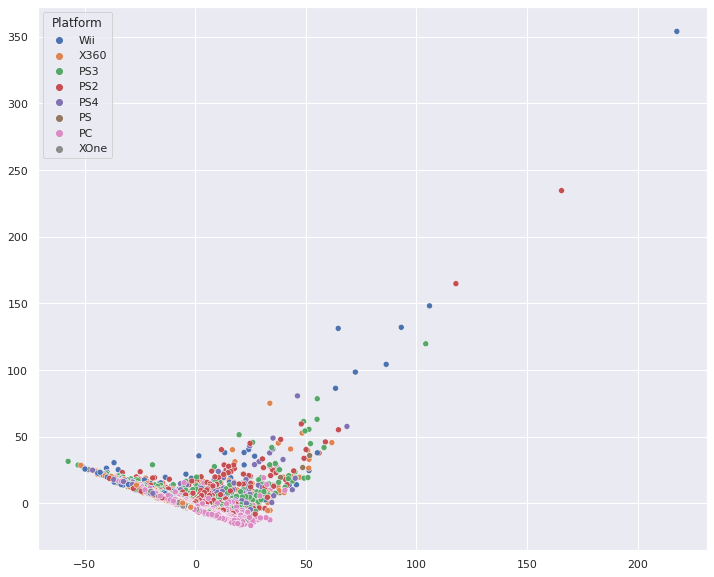

In [99]:
# There is a slight pattern to be noticed on the PCA plot colored by the platform
# PC game seem to have higher scores with lower sales
# whereas Wii games seem to have higher sales but lower scores
sns.scatterplot(data_n_popular_pca[:,0], data_n_popular_pca[:,1], hue = popular_platforms['Platform'] )

In [100]:
umap_reducer = umap.UMAP()

In [101]:
data_n_popular_umap = umap_reducer.fit_transform(data_n_popular)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


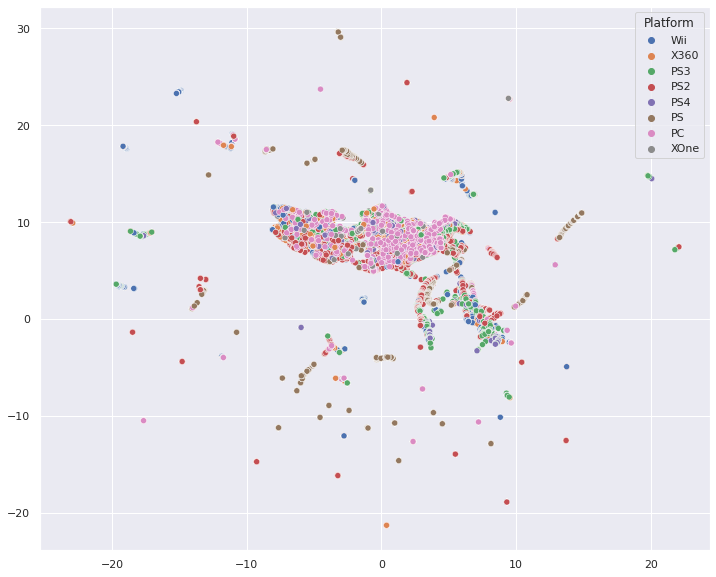

In [102]:
sns.scatterplot(data_n_popular_umap[:,0], data_n_popular_umap[:,1], hue = popular_platforms['Platform'] )

Umap also shows a more noticable pattern.

The main cluster is mostly made up of PC and PS2 games.

The other big cluster contains mostly PS2 and PS3 games.


##KMeans using inertial for the selected data

In [103]:
inertia1 = []
K = range(1,11)
for k in K:
    kmeanModel_popular = KMeans(n_clusters=k)
    kmeanModel_popular.fit(data_n_popular)
    inertia1.append(kmeanModel_popular.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


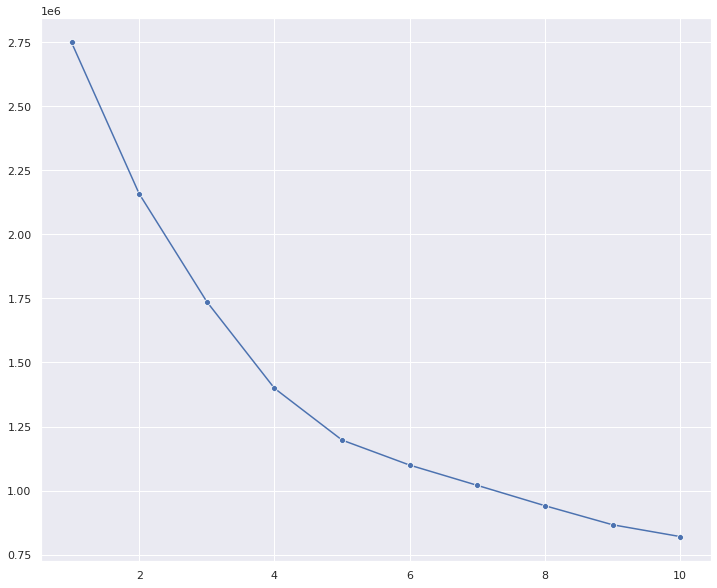

In [104]:
sns.lineplot(K, inertia1, marker="o")

In [105]:
clusterer_popular = KMeans(n_clusters=5)
clusterer_popular.fit(data_n_popular)

KMeans(n_clusters=5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


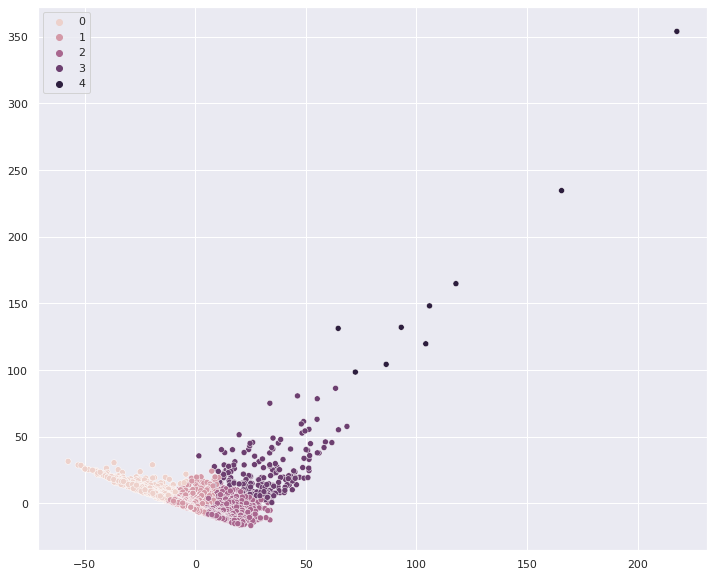

In [106]:
sns.scatterplot(data_n_popular_pca[:,0], data_n_popular_pca[:,1], hue = clusterer_popular.labels_ )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


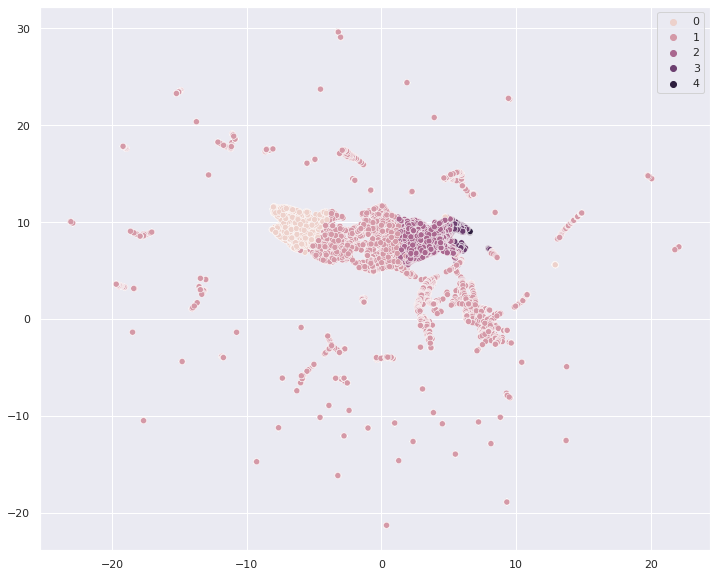

In [107]:
# this time the umap plot also seems to provide a good space to present the clusters
sns.scatterplot(data_n_popular_umap[:,0], data_n_popular_umap[:,1], hue = clusterer_popular.labels_ )

In [108]:
# there is no strong pattern to be moticed
pd.crosstab(clusterer_popular.labels_, popular_platforms['Genre'])

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
row_0,,,,,,,,,,,,
0,269,42,48,71,46,9,97,49,130,37,151,24
1,1150,482,315,700,197,117,479,420,464,314,929,289
2,344,44,96,85,59,12,143,186,253,73,309,94
3,48,4,7,15,8,0,13,21,46,2,32,1
4,2,0,0,1,1,0,2,0,0,0,3,0


In [109]:
# there is some slight pattern to be noticed
# such as the overwhelming majority of PS game sin cluster 0
pd.crosstab(clusterer_popular.labels_, popular_platforms['Platform'])

Platform,PC,PS,PS2,PS3,PS4,Wii,X360,XOne
row_0,,,,,,,,
0,67,34,236,166,30,198,218,24
1,513,1061,1437,814,253,965,665,148
2,364,80,409,278,81,100,315,71
3,8,15,43,47,29,17,34,4
4,0,0,2,1,0,6,0,0


##KMeans using silhouette for selected data

In [110]:
silhouette1 = []
N = [2,3,4,5,6,7,8,9,]
for n in N:
    clust = KMeans(n_clusters=n)
    clust_labels = clust.fit_predict(data_n_popular)
    silhouette1.append(silhouette_score(data_n_popular, clust_labels))

In [111]:
silhouette1 = pd.DataFrame(silhouette1, index=[2,3,4,5,6,7,8,9])
silhouette1 = silhouette1.reset_index()
silhouette1.columns = ["n_clusters", "silhouette_score"]
silhouette1

,n_clusters,silhouette_score
0,2,0.446068
1,3,0.482663
2,4,0.460344
3,5,0.434606
4,6,0.434288
5,7,0.435377
6,8,0.434685
7,9,0.429229


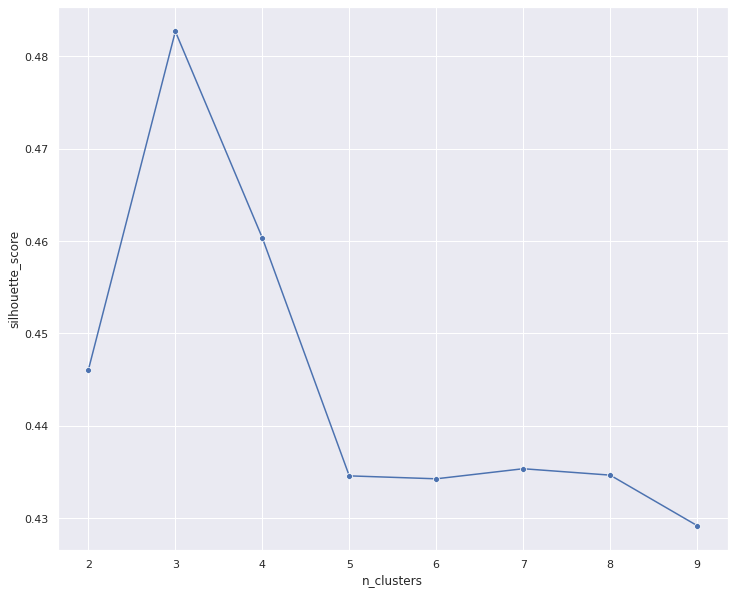

In [112]:
# here the number of clusters appears to be three
sns.lineplot(data = silhouette1, x = "n_clusters", y = "silhouette_score", marker = "o")

In [113]:
clusterer2_popular = KMeans(n_clusters=3)
clusterer2_popular.fit(data_n_popular)

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


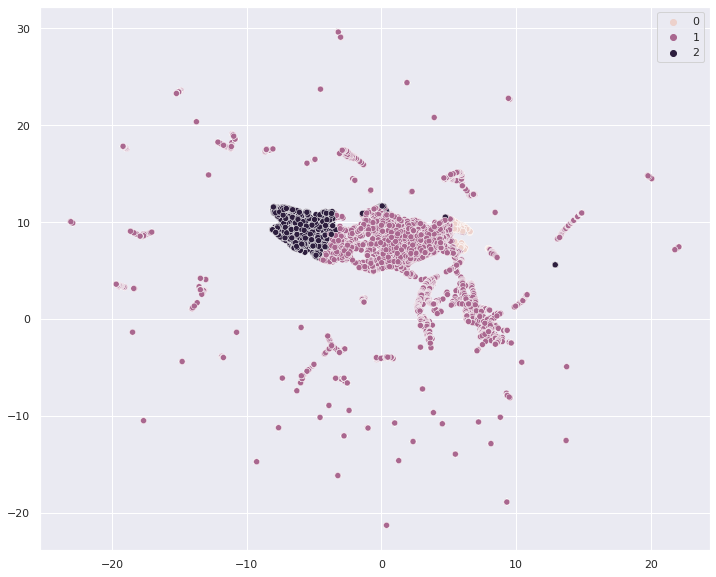

In [114]:
sns.scatterplot(data_n_popular_umap[:,0], data_n_popular_umap[:,1], hue = clusterer2_popular.labels_ )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


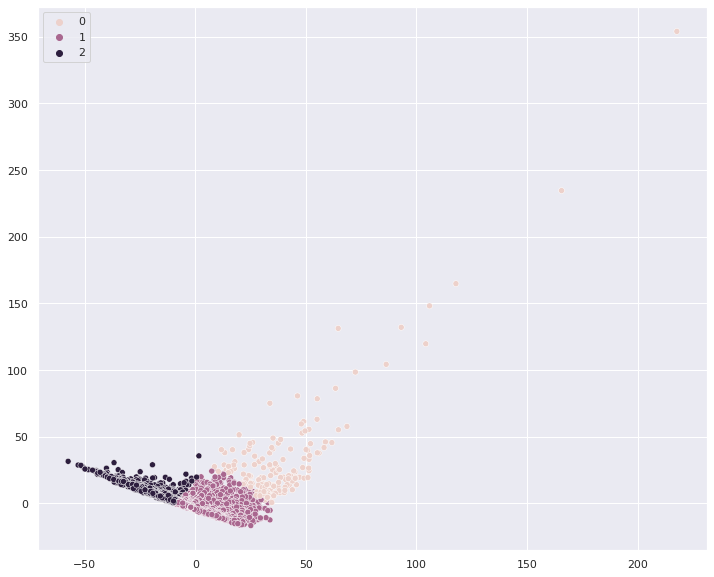

In [115]:
sns.scatterplot(data_n_popular_pca[:,0], data_n_popular_pca[:,1], hue = clusterer2_popular.labels_ )

It seams that the clusters correspond well with the umap and the pca.

In [116]:
#we do not notice any patterns 
pd.crosstab(clusterer2_popular.labels_, popular_platforms['Genre'])

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
row_0,,,,,,,,,,,,
0,44,3,7,12,8,0,14,20,38,1,29,1
1,1410,512,399,764,240,126,591,585,699,376,1186,370
2,359,57,60,96,63,12,129,71,156,49,209,37


In [117]:
pd.crosstab(clusterer2_popular.labels_, popular_platforms['Platform'])

Platform,PC,PS,PS2,PS3,PS4,Wii,X360,XOne
row_0,,,,,,,,
0,7,13,42,43,22,19,29,2
1,844,1137,1766,1039,328,1009,918,217
2,101,40,319,224,43,258,285,28


##Hierarchical clustering for selected

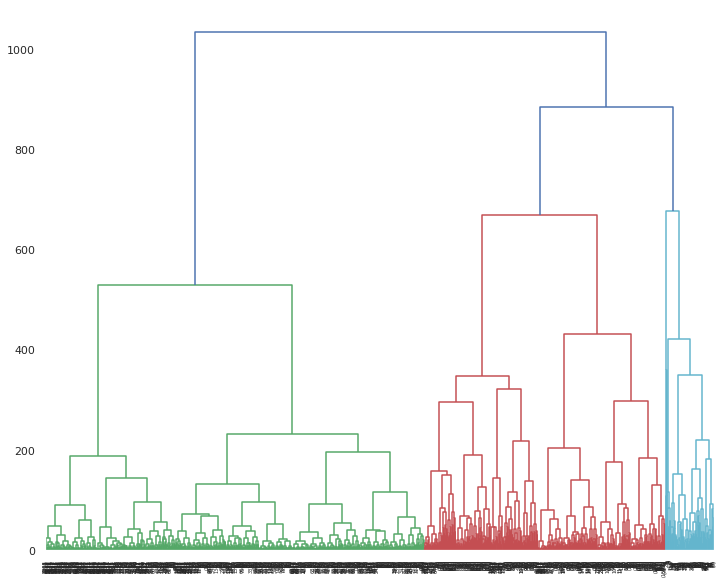

In [118]:
#we can see 3 different clusters in here
link = linkage(data_n_popular, "ward")
dendrogram(link, orientation='top', distance_sort='descending', truncate_mode="level", p = 10,)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


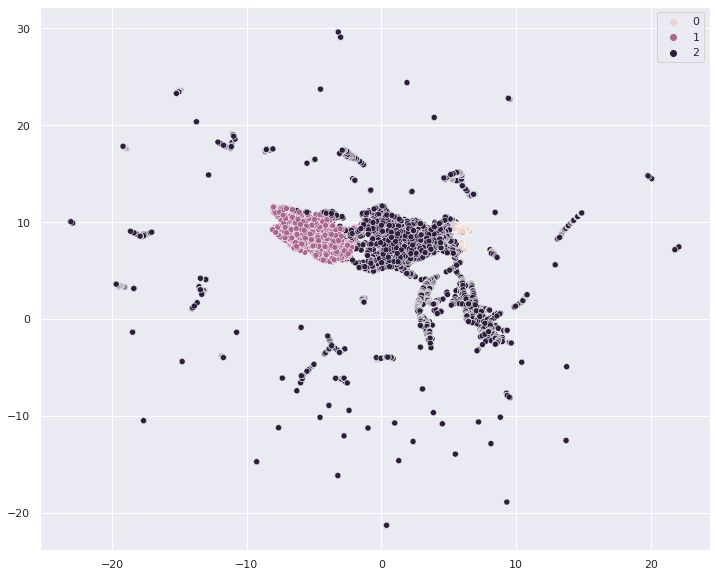

In [119]:
clusterer_h = AgglomerativeClustering(n_clusters=3).fit(data_n_popular)
sns.scatterplot(data_n_popular_umap[:,0], data_n_popular_umap[:,1], hue = clusterer_h.labels_ )

In [120]:
#we see no patterns in the table 
pd.crosstab(clusterer_h.labels_, popular_platforms['Platform'])

Platform,PC,PS,PS2,PS3,PS4,Wii,X360,XOne
row_0,,,,,,,,
0,5,19,37,35,15,21,26,1
1,112,62,484,274,62,293,331,41
2,835,1109,1606,997,316,972,875,205


#Supervised Machine Learning

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

##Selected platforms

As overall the patterns were stronger for the set with selected platforms for the supervised learning we will explore how well can the platform be predicted based on the numerc variables in data_n_popular.

In [122]:
data_n_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8733 entries, 0 to 16715
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  8733 non-null   float64
 1   NA_Sales         8733 non-null   float64
 2   EU_Sales         8733 non-null   float64
 3   JP_Sales         8733 non-null   float64
 4   Other_Sales      8733 non-null   float64
 5   Critic_Score     8733 non-null   float64
 6   Critic_Count     8733 non-null   float64
 7   User_Score       8733 non-null   float64
 8   User_Count       8733 non-null   float64
 9   Rating_Dummy     8733 non-null   bool   
dtypes: bool(1), float64(9)
memory usage: 690.8 KB


In [123]:
# choosing the platform as y
y = popular_platforms["Platform"]

In [124]:
# choosing the numeric variables that describe it as X
X = data_n_popular

In [125]:
# creating a train and test set with the test size as 25% of the total database
# this should provide enough entries to test on without decreasing the train set too much
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.25,stratify=y, random_state=30)

## KNN

In [126]:
# hyperparameter tuning for KNN - iterating over the range of 50
# hyperparameter tuning allows us to fint the best variable 
#'n_neighbors' is the numbe of neigboring points that will be taken into account
#when predicting y
grid_knn = {'n_neighbors': np.arange(1, 50)}

In [127]:
#initiating the classifier 
#we use the 10 folds to get the best prediction and to avoid overfitting
knn = KNeighborsClassifier()
knn_search = GridSearchCV(knn, grid_knn, cv=10)

In [128]:
#fitting in the classifier to the data
knn_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [129]:
print(knn_search.best_params_)
# accuracy score - it can easily be skewed when the sample is not balanced
print(knn_search.best_score_)

{'n_neighbors': 6}
0.5808523005812731


In [130]:
#calculating AUC score, less likely to be skewed
knn_best = KNeighborsClassifier(n_neighbors=9)
knn_best.fit(X_train, y_train)
y_pred_prob = knn_best.predict_proba(X_test)

In [131]:
roc_score_knn = roc_auc_score(y_test, y_pred_prob, multi_class="ovr")

In [132]:
# the test set score
roc_score_knn

0.8495213878291121

In [133]:
# train set score
#roc auc score is higher for the train set than the test set, so it is overfitting slightly
y_pred_prob1 = knn_best.predict_proba(X_train)
roc_score_knn1 = roc_auc_score(y_train, y_pred_prob1, multi_class="ovr")
roc_score_knn1

0.9410039511224042

In [134]:
y_pred = knn_best.predict(X_test)

In [135]:
#PC seems to have the most mislabeled predictions
#PS2 and PS3 also has mislabels but not as many as PC
knn_tab = pd.crosstab(y_test,y_pred)
knn_tab

col_0,PC,PS,PS2,PS3,PS4,Wii,X360,XOne
Platform,,,,,,,,
PC,152,9,31,11,3,14,13,5
PS,5,250,33,1,0,6,1,1
PS2,28,17,404,40,2,24,17,0
PS3,29,1,65,139,14,29,47,3
PS4,14,0,11,33,17,3,16,4
Wii,27,3,88,34,2,144,22,2
X360,35,1,53,46,2,43,126,2
XOne,20,0,6,8,5,7,8,8


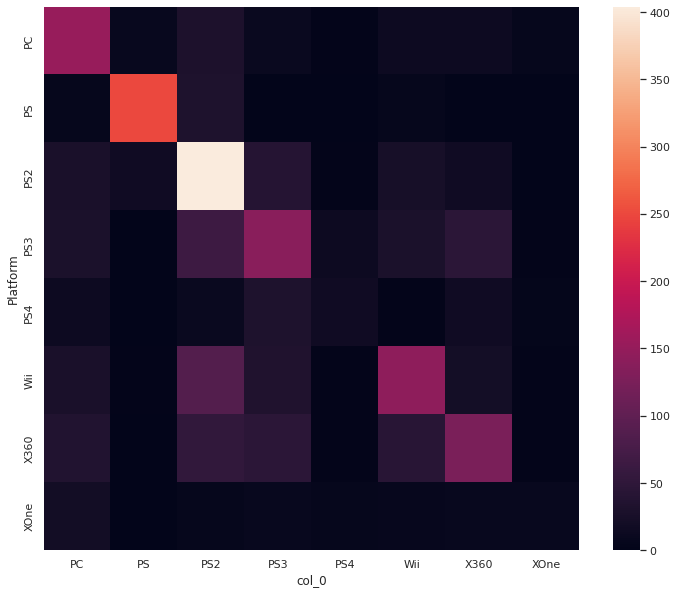

In [136]:
# the classifier appears to be quite good at detecting the platforms
sns.heatmap(data = knn_tab)

## Logistic regression

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
#another type of regresson to check for errors
grid_l = {'C' : np.logspace(-4, 4, 5)}

In [139]:
# setting up a higher number of maximal iterations, as by default it is 100 which is too low here
# we used only 5 folds becaus it is too computationaly expensive
logreg = LogisticRegression(max_iter= 100000)
logreg_search = GridSearchCV(logreg, grid_l, cv=5)

In [140]:
logreg_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])})

In [141]:
print(logreg_search.best_params_)
# accuracy score - it can easily be skewed when the sample is not balanced
print(logreg_search.best_score_)

{'C': 10000.0}
0.6744507490713149


In [142]:
#another type of regresson to check for errors
# here the algorithm will iterate over -10000 and 
#10000 to determine the regularization strength

# smaller number = stronger regularization

#max_iter was changed to 100000 because the default is 100 and 
#it is not high enough 
logreg_best = LogisticRegression(C=10000, max_iter= 100000)
logreg_best.fit(X_train, y_train)
y_pred_prob2 = logreg_best.predict_proba(X_test)

In [143]:
# it is the score for testing 
roc_score_logreg = roc_auc_score(y_test, y_pred_prob2, multi_class="ovr")
roc_score_logreg

0.9359158414940164

In [144]:
y_pred2 = logreg_best.predict(X_test)

In [145]:
# it is the score for training
 
# really good roc auc scores, it is only slightly higher for the train set
# the data is less overfitted than previously
y_pred_prob3 = knn_best.predict_proba(X_train)
roc_score_knn3 = roc_auc_score(y_train, y_pred_prob3, multi_class="ovr")
roc_score_knn3

0.9410039511224042

In [146]:
#there are less missgruppings than before 
logreg_tab = pd.crosstab(y_test,y_pred2)
logreg_tab

col_0,PC,PS,PS2,PS3,PS4,Wii,X360,XOne
Platform,,,,,,,,
PC,149,12,25,14,3,13,9,13
PS,0,273,23,0,0,1,0,0
PS2,13,17,433,17,0,44,8,0
PS3,11,0,27,183,23,56,26,1
PS4,0,0,0,24,68,0,0,6
Wii,61,0,26,18,0,169,45,3
X360,27,0,17,15,2,61,170,16
XOne,4,0,0,6,8,2,9,33


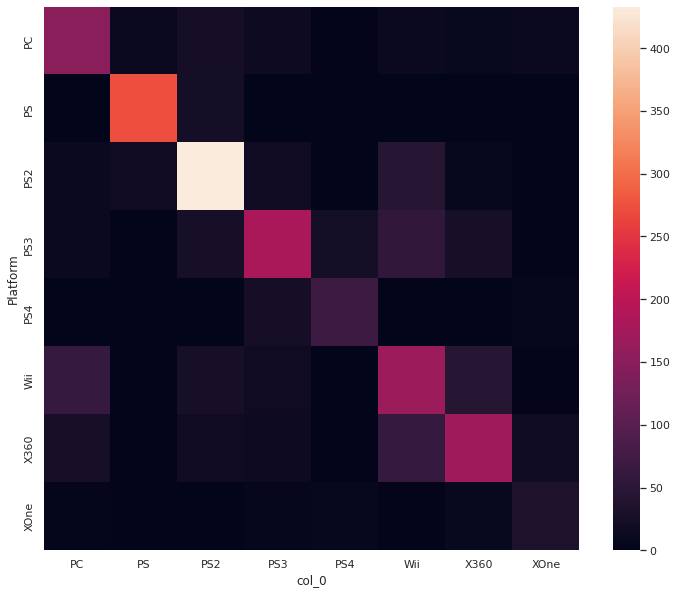

In [147]:
#the heatmap is shows the improvement
sns.heatmap(data = logreg_tab)

## Random Forest Classfier

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
# iterating over 10-101 as number of estimators
grid_rf = {'n_estimators' : list(range(10,101,10))}

In [150]:
# we used only 5 folds becaus it is too computationaly expensive
rf = RandomForestClassifier()
rf_search = GridSearchCV(rf, grid_rf, cv=5)

In [151]:
rf_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [152]:
print(rf_search.best_params_)
# accuracy score - it can easily be skewed when the sample is not balanced
print(rf_search.best_score_)

{'n_estimators': 100}
0.7654587442194088


In [153]:
rf_best = RandomForestClassifier(n_estimators= 80)
rf_best.fit(X_train, y_train)
y_pred_prob4 = rf_best.predict_proba(X_test)

In [154]:
#it is the score for the test set 
roc_score_rf = roc_auc_score(y_test, y_pred_prob4, multi_class="ovr")
roc_score_rf

0.9536094236339756

In [155]:
#it is a score for the train set
#the data is underfitting slightly 
# the scores are even better in this case
y_pred_prob5 = knn_best.predict_proba(X_train)
roc_score_knn5 = roc_auc_score(y_train, y_pred_prob5, multi_class="ovr")
roc_score_knn5

0.9410039511224042

In [156]:
y_pred4 = rf_best.predict(X_test)

In [157]:
#we can recognize very few wrong labels
rf_tab = pd.crosstab(y_test,y_pred4)
rf_tab

col_0,PC,PS,PS2,PS3,PS4,Wii,X360,XOne
Platform,,,,,,,,
PC,198,4,7,3,3,11,10,2
PS,1,283,13,0,0,0,0,0
PS2,2,6,500,10,0,12,2,0
PS3,8,0,18,206,11,39,44,1
PS4,6,0,0,13,67,0,1,11
Wii,13,0,18,39,0,206,46,0
X360,11,0,12,28,0,45,204,8
XOne,5,0,0,3,4,0,8,42


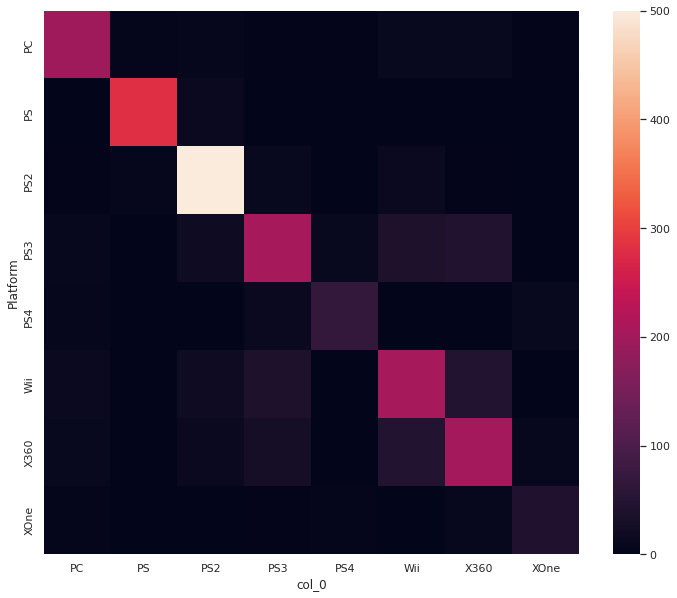

In [158]:
#results a clear heatmap
sns.heatmap(data = rf_tab)

## Voting Classifier

In [159]:
from sklearn.ensemble import VotingClassifier

In [160]:
#it lists all the previously used classifier
classifiers = [("KNN",knn_best),("Logistic",logreg_best),("Random_Forest",rf_best)]

In [161]:
# creating a voting classifier
vc = VotingClassifier(estimators=classifiers)

In [162]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=9)),
                             ('Logistic',
                              LogisticRegression(C=10000, max_iter=100000)),
                             ('Random_Forest',
                              RandomForestClassifier(n_estimators=80))])

In [163]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=9)),
                             ('Logistic',
                              LogisticRegression(C=10000, max_iter=100000)),
                             ('Random_Forest',
                              RandomForestClassifier(n_estimators=80))])

In [164]:
from sklearn.metrics import accuracy_score

It is not possible to do a auc test on voting classifier, so it will be compared using the accuracy score instead.
 (the first metric used for every classifier)

In [165]:
y_pred_fin = vc.predict(X_test)

In [166]:
#it is the better compare to the previous accuracy score 
#not much better than the random forest
accuracy_score(y_test,y_pred_fin)

0.7403846153846154

In [167]:
#it is overfitting quite significantly
y_pred_fin1 = vc.predict(X_train)
accuracy_score(y_train,y_pred_fin1)

0.8303557795083218

In [168]:
#there are slightly more missgrupps than random forest
vc_tab = pd.crosstab(y_test,y_pred_fin)
vc_tab

col_0,PC,PS,PS2,PS3,PS4,Wii,X360,XOne
Platform,,,,,,,,
PC,192,6,14,8,0,9,5,4
PS,0,286,11,0,0,0,0,0
PS2,9,9,497,8,0,7,2,0
PS3,22,0,34,197,7,35,32,0
PS4,8,0,4,20,59,0,0,7
Wii,31,0,43,30,0,192,26,0
X360,31,0,37,31,2,35,165,7
XOne,11,0,2,5,6,0,9,29


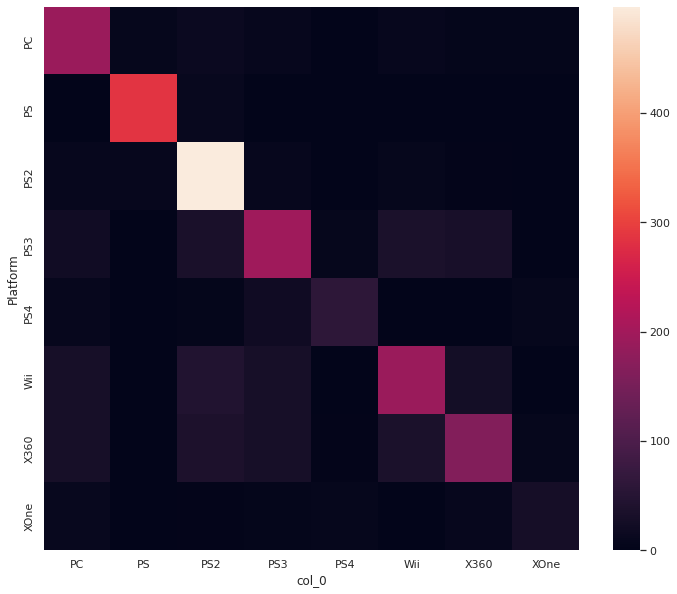

In [169]:
#previous statement is visible on the map
sns.heatmap(vc_tab)

The random forest and the voting classifier seems to work well but we can recognize that the voting classifier is overfitting the data so it is better to use random forest. 

In [170]:
from sklearn.metrics import classification_report,confusion_matrix 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[152   9  31  11   3  14  13   5]
 [  5 250  33   1   0   6   1   1]
 [ 28  17 404  40   2  24  17   0]
 [ 29   1  65 139  14  29  47   3]
 [ 14   0  11  33  17   3  16   4]
 [ 27   3  88  34   2 144  22   2]
 [ 35   1  53  46   2  43 126   2]
 [ 20   0   6   8   5   7   8   8]]
              precision    recall  f1-score   support

          PC       0.49      0.64      0.55       238
          PS       0.89      0.84      0.87       297
         PS2       0.58      0.76      0.66       532
         PS3       0.45      0.43      0.44       327
         PS4       0.38      0.17      0.24        98
         Wii       0.53      0.45      0.49       322
        X360       0.50      0.41      0.45       308
        XOne       0.32      0.13      0.18        62

    accuracy                           0.57      2184
   macro avg       0.52      0.48      0.48      2184
weighted avg       0.56      0.57      0.56      2184

